# Plant Disease Prediction

## Importing Dataset

Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

## Importing libraries

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import zipfile

In [ ]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset


Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors
 99% 2.68G/2.70G [00:17<00:00, 258MB/s]
100% 2.70G/2.70G [00:17<00:00, 166MB/s]


In [ ]:
# 2. Créer le dossier 'dataset' si ce n'est pas déjà fait
destination_folder = 'dataset'
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

In [ ]:
# 3. Décompresser le fichier ZIP téléchargé dans le dossier 'dataset'
zip_file = 'new-plant-diseases-dataset.zip'  # Nom du fichier ZIP téléchargé


In [ ]:
# Assurez-vous que le fichier ZIP existe avant de tenter de le décompresser
if os.path.exists(zip_file):
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall(destination_folder)
    print(f"Les fichiers ont été extraits dans le dossier '{destination_folder}'.")
else:
    print(f"Le fichier {zip_file} n'existe pas. Assurez-vous d'abord qu'il est téléchargé.")

Les fichiers ont été extraits dans le dossier 'dataset'.


In [ ]:
import os

# Vérifier la structure du dossier
dataset_dir = 'dataset'  # Remplacez par le chemin vers votre dossier dataset
print(os.listdir(dataset_dir))  # Liste les fichiers et sous-dossiers dans le dossier dataset


['new plant diseases dataset(augmented)', 'New Plant Diseases Dataset(Augmented)', 'test']


In [ ]:
import os

# Liste des fichiers et sous-dossiers dans "New Plant Diseases Dataset(Augmented)"
train_dir = 'dataset/New Plant Diseases Dataset(Augmented)'
print("Contenu du dossier d'entraînement : ", os.listdir(train_dir))

# Liste des fichiers et sous-dossiers dans "test"
test_dir = 'dataset/test'
print("Contenu du dossier de test : ", os.listdir(test_dir))


Contenu du dossier d'entraînement :  ['New Plant Diseases Dataset(Augmented)']
Contenu du dossier de test :  ['test']


In [ ]:
# Vérifier le contenu du dossier "New Plant Diseases Dataset(Augmented)"
train_dir = 'dataset/New Plant Diseases Dataset(Augmented)'
print(os.listdir(train_dir))  # Affiche le contenu du dossier d'entraînement


['New Plant Diseases Dataset(Augmented)']


In [ ]:
# Vérifier le contenu du sous-dossier
sub_train_dir = 'dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)'
print(os.listdir(sub_train_dir))  # Affiche le contenu du sous-dossier


['valid', 'train']


## Data Preprocessing

### Training Image preprocessing

In [ ]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


### Validation Image Preprocessing

In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


#### To avoid Overshooting Loss function
1. Choose small learning rate default 0.001 here we have taken 0.0001
2. There may be chance of underfitting so increase number of neuron
3. Add more Convolutional Layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

## Building Model

In [ ]:
import tensorflow as tf
cnn = tf.keras.models.Sequential()

### Building Convolution Layer

In [ ]:
cnn.add(tf.keras.layers.ZeroPadding2D(padding=((1, 1), (1, 1)), input_shape=(128, 128, 3)))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/zero_padding2d.py:72: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [ ]:
cnn.add(tf.keras.layers.Flatten())

In [ ]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [ ]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

### Compiling and Training Phase

In [ ]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ zero_padding2d (ZeroPadding2D)       │ (None, 130, 130, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 130, 130, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 62, 62, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 31, 31, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 31, 31, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 29, 29, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 188s 78ms/step - accuracy: 0.4068 - loss: 2.0952 - val_accuracy: 0.8242 - val_loss: 0.5539
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 159s 72ms/step - accuracy: 0.8411 - loss: 0.5062 - val_accuracy: 0.9109 - val_loss: 0.2749
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 202s 72ms/step - accuracy: 0.9071 - loss: 0.2879 - val_accuracy: 0.9335 - val_loss: 0.2112
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 167s 76ms/step - accuracy: 0.9344 - loss: 0.2022 - val_accuracy: 0.9402 - val_loss: 0.1909
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 194s 72ms/step - accuracy: 0.9527 - loss: 0.1452 - val_accuracy: 0.9405 - val_loss: 0.1968
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 203s 73ms/step - accuracy: 0.9628 - loss: 0.1122 - val_accuracy: 0.9519 - val_loss: 0.1669
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 158s 72ms/step - accuracy: 0.9713 - loss: 0.0927 - val_accuracy: 0.9560 - val_loss: 0.1432
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 166s 75ms/step - accuracy: 

## Evaluating Model

In [ ]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 57s 26ms/step - accuracy: 0.9861 - loss: 0.0405
Training accuracy: 0.9871683716773987


In [ ]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - accuracy: 0.9605 - loss: 0.1402
Validation accuracy: 0.9603915214538574


In [ ]:
#mount google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Saving Model

In [ ]:
cnn.save('/content/gdrive/MyDrive/Colab Notebooks/trained_plant_disease_model.h5')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
file_path = '/content/gdrive/MyDrive/Colab Notebooks/Plant disease/trained_plant_disease_model.keras'
print("File exists:", os.path.exists(file_path))


File exists: True


In [ ]:
training_history.history #Return Dictionary of history

{'accuracy': [0.6085354685783386,
  0.8630627989768982,
  0.9158830642700195,
  0.940493643283844,
  0.9556725025177002,
  0.9656020998954773,
  0.9721601605415344,
  0.9763994812965393,
  0.9787609577178955,
  0.9817056655883789],
 'loss': [1.3253793716430664,
  0.43475237488746643,
  0.2597152888774872,
  0.18200765550136566,
  0.13508085906505585,
  0.10418189316987991,
  0.08678831160068512,
  0.0723133534193039,
  0.06524474173784256,
  0.056551747024059296],
 'val_accuracy': [0.8242089748382568,
  0.9108809232711792,
  0.9334737062454224,
  0.9402458667755127,
  0.9404734969139099,
  0.9518552422523499,
  0.9559526443481445,
  0.954643726348877,
  0.9609037041664124,
  0.9603915214538574],
 'val_loss': [0.5538938641548157,
  0.2749338448047638,
  0.21117641031742096,
  0.19094081223011017,
  0.1968328207731247,
  0.1669238805770874,
  0.14319904148578644,
  0.14815114438533783,
  0.13002517819404602,
  0.13492335379123688]}

In [ ]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [ ]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


## Accuracy Visualization

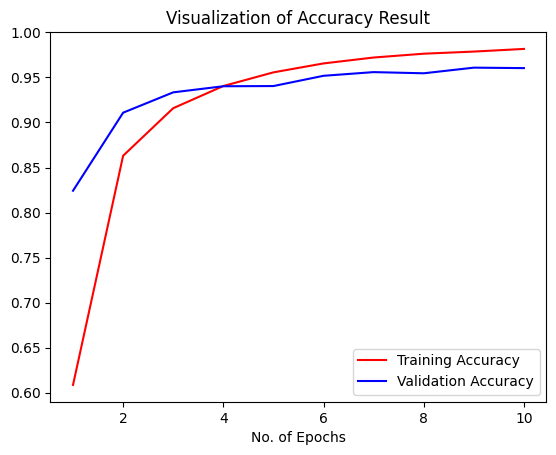

In [ ]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## Some other metrics for model evaluation

In [ ]:
class_name = validation_set.class_names

In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [ ]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 45s 2ms/step


In [ ]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [ ]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [ ]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [ ]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.92      0.98      0.95       504
                                 Apple___Black_rot       0.95      0.99      0.97       497
                          Apple___Cedar_apple_rust       0.99      0.93      0.96       440
                                   Apple___healthy       0.94      0.98      0.96       502
                               Blueberry___healthy       0.97      0.99      0.98       454
          Cherry_(including_sour)___Powdery_mildew       1.00      0.98      0.99       421
                 Cherry_(including_sour)___healthy       0.99      0.97      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.94      0.91      0.93       410
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.95      0.95      0.

### Confusion Matrix Visualization

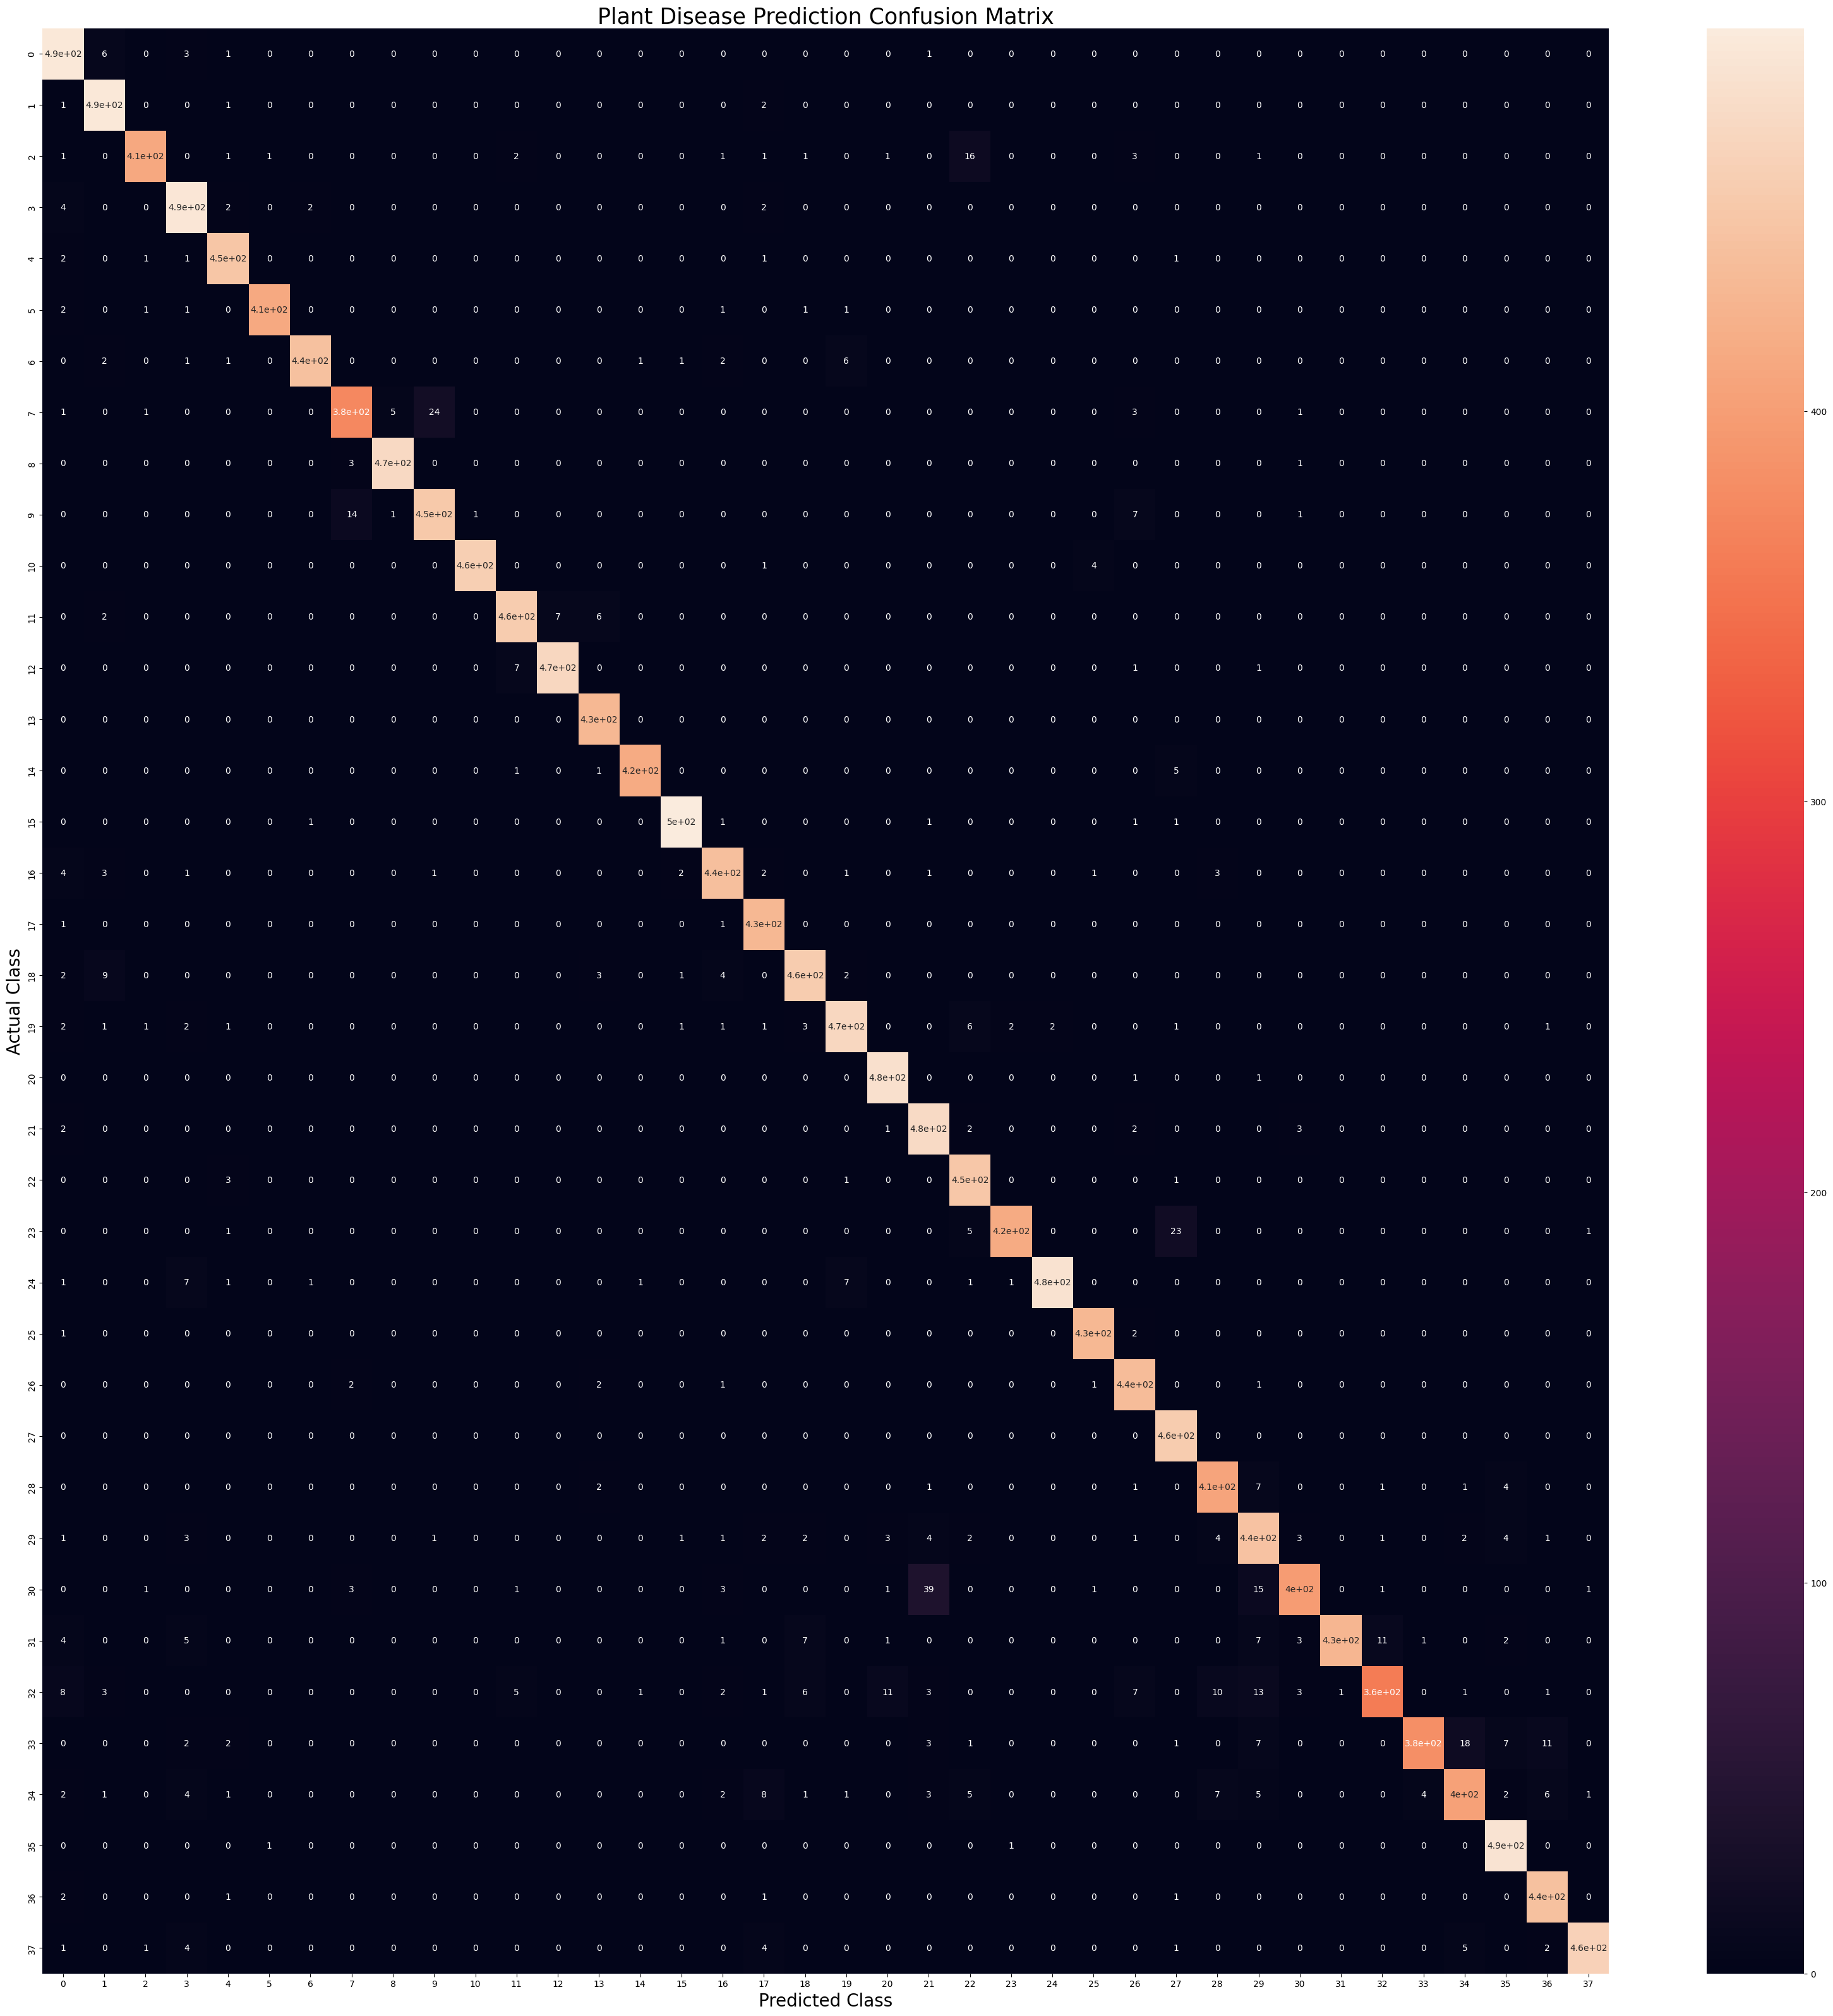

In [ ]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()

## **TEST**

In [ ]:
!fusermount -u /content/gdrive
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 17572 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

In [ ]:
import tensorflow as tf
import os

# Define the path to your saved model file in Google Drive
model_path = '/content/gdrive/MyDrive/Colab Notebooks/trained_plant_disease_model.h5'

# Check if the model file exists at the specified path
if os.path.exists(model_path):
  cnn = tf.keras.models.load_model(model_path)
  print("Model loaded successfully.")
else:
  print(f"Model file not found at: {model_path}")
  print("Please check the path and make sure the model file exists.")

Model file not found at: /content/gdrive/MyDrive/Colab Notebooks/trained_plant_disease_model.h5
Please check the path and make sure the model file exists.


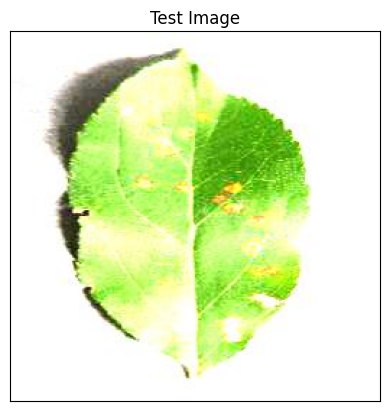

In [ ]:
#Test Image Visualization
import cv2
image_path = 'dataset/test/test/AppleCedarRust1.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [1]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

In [ ]:
print(predictions)

[[2.6204000e-06 1.6780637e-08 9.9996734e-01 1.1070548e-08 1.5182331e-07
  6.3888031e-08 1.3436907e-10 1.1768662e-07 1.4901611e-10 6.7471717e-09
  1.3588816e-10 5.1992220e-07 3.1058484e-08 1.5627012e-09 2.4531074e-08
  7.8408794e-07 2.4795600e-07 2.4401064e-08 1.2369863e-07 7.2660885e-07
  5.2911833e-08 4.2582805e-08 5.1632355e-07 5.5322658e-08 4.4092471e-10
  2.4796815e-08 1.2019000e-09 3.0838054e-09 9.3004965e-06 1.9657248e-06
  9.1522370e-06 1.3287084e-09 6.7103926e-08 2.5415570e-08 8.1102229e-07
  4.9604300e-06 2.9344399e-08 2.2068789e-07]]


In [ ]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

2


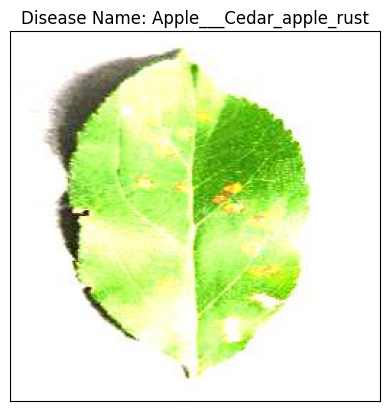

In [ ]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:

# Verify the file path and existence
import os
file_path = '/content/gdrive/MyDrive/Colab Notebooks/Plant disease/trained_plant_disease_model.keras'
if os.path.exists(file_path):
  print("File exists at the specified path.")
else:
  print("File not found. Please check the path and ensure the model was saved correctly.")

# Load the model if it exists
import tensorflow as tf
from tensorflow.keras.models import load_model

if os.path.exists(file_path):
  model = tf.keras.models.load_model(file_path)
  print("Model loaded successfully.")

File exists at the specified path.
Model loaded successfully.


In [ ]:
# Convertir le modèle en format TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

Saved artifact at '/tmp/tmpmg5v9qsf'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 38), dtype=tf.float32, name=None)
Captures:
  134703169869376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134703255004864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134703255008560: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134703255052784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134703255057536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134703255058240: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134703282037408: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134703254781296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134703254779184: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134703255059120: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13470325500451

In [ ]:
# Écrire le modèle TFLite dans un fichier
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

from google.colab import files

files.download('model.tflite')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>